In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

## CLustering

### Data

Read a description of the dataset at [kaggle](https://www.kaggle.com/datasets/abcsds/pokemon)

In [2]:
df = pd.read_csv('https://query.data.world/s/5e6duiuljta3i6ydhobv3jf75hrt73')
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [5]:
df.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


In [3]:
df_num = df.\
    select_dtypes(include=np.number).\
    drop('number', axis = 1)
df_num.head()

,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,525,80,82,83,100,100,80,1


In [4]:
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=3)
kmodel.fit(df_num)

KMeans(n_clusters=3)

In [5]:
kmodel.cluster_centers_

array([[476.43333333,  77.39259259,  87.32777778,  81.91481481,
         77.93148148,  79.33148148,  72.53518519,   4.42037037],
       [302.04972376,  49.6878453 ,  54.11049724,  52.17403315,
         47.29281768,  49.13259669,  49.8038674 ,   4.07458564],
       [623.60588235,  92.84117647, 117.77058824, 101.44117647,
        113.8       , 100.41176471,  97.34117647,   4.36470588]])

In [6]:
kmodel.labels_

array([1, 0, 0, ..., 0, 2, 2])

In [7]:
res = df_num.copy()
res["cluster"] = kmodel.labels_
res.head()

,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,cluster
0,318,45,49,49,65,65,45,1,1
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,2
4,525,80,82,83,100,100,80,1,0


In [8]:
res.groupby("cluster").mean().transpose()

cluster,0,1,2
total,476.433333,302.049724,623.605882
hp,77.392593,49.687845,92.841176
attack,87.327778,54.110497,117.770588
defense,81.914815,52.174033,101.441176
sp_attack,77.931481,47.292818,113.800000
sp_defense,79.331481,49.132597,100.411765
speed,72.535185,49.803867,97.341176
generation,4.420370,4.074586,4.364706


In [9]:
res.groupby("cluster").std().transpose()

cluster,0,1,2
total,41.755286,46.562177,65.303325
hp,23.145453,14.591361,28.805891
attack,24.839335,18.745827,30.389975
defense,26.531043,19.625725,33.650124
sp_attack,24.784880,16.832148,31.955516
sp_defense,21.795204,15.741298,28.255510
speed,27.237985,19.753682,29.931896
generation,2.403451,2.286287,2.268107


In [11]:
res

,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,cluster
0,318,45,49,49,65,65,45,1,1
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,2
4,525,80,82,83,100,100,80,1,0
...,...,...,...,...,...,...,...,...,...
1067,580,100,145,130,65,110,30,8,2
1068,580,100,65,60,145,80,130,8,2
1069,500,100,80,80,80,80,80,8,0
1070,680,100,165,150,85,130,50,8,2


In [12]:
res_long = res.melt(id_vars = ['cluster'],
    value_vars = ['total', 'attack', 'defense', 'sp_attack', 'sp_defense',
                  'speed', 'generation'],
    value_name = 'value')
res_long

,cluster,variable,value
0,1,total,318
1,0,total,405
2,0,total,525
3,2,total,625
4,0,total,525
...,...,...,...
7499,2,generation,8
7500,2,generation,8
7501,0,generation,8
7502,2,generation,8


<AxesSubplot:xlabel='variable', ylabel='value'>

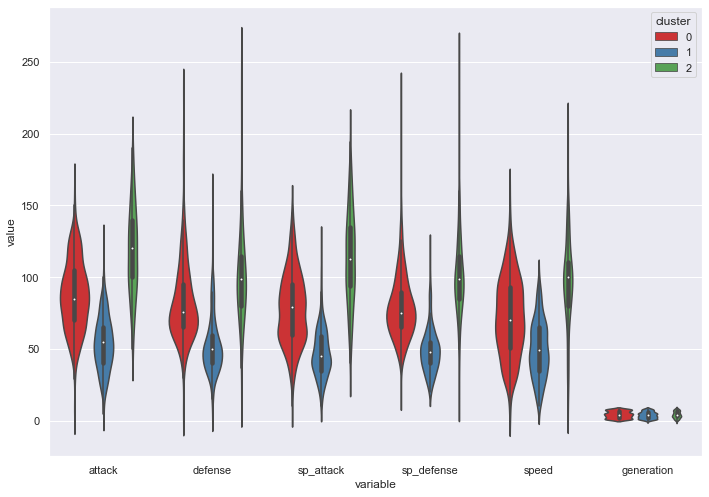

In [13]:
sns.violinplot(data = res_long[res_long['variable']!= 'total'],
               x = 'variable',
               y = 'value',
               scale = 'count',
               hue = 'cluster',
               palette="Set1")

In 2-3 sentences describe each cluster. There is no need to go into a great details, but try to provide enough information

## uncertainty

In [14]:
two_dim = res.groupby("cluster").mean()[['attack', 'defense']]
two_dim

,attack,defense
cluster,,
0,87.327778,81.914815
1,54.110497,52.174033
2,117.770588,101.441176


<AxesSubplot:xlabel='attack', ylabel='defense'>

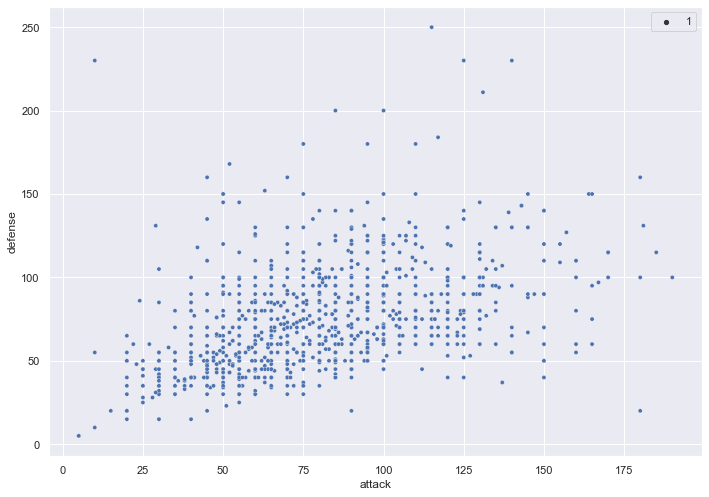

In [16]:
sns.scatterplot(data = df_num,
                x = 'attack',
                y = 'defense', size = 1)

<AxesSubplot:xlabel='attack', ylabel='defense'>

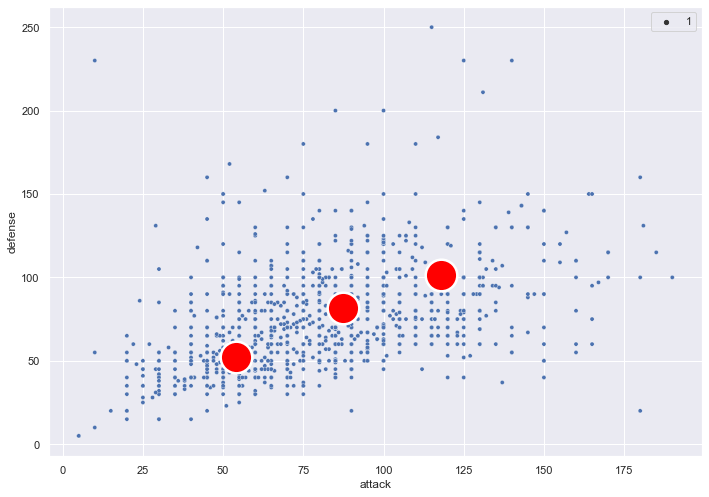

In [18]:
sns.scatterplot(data = df_num,
                x = 'attack',
                y = 'defense', size = 1)
sns.scatterplot(data = two_dim,
                x = 'attack',
                y = 'defense', color = 'red', s = 1000)

<AxesSubplot:xlabel='attack', ylabel='defense'>

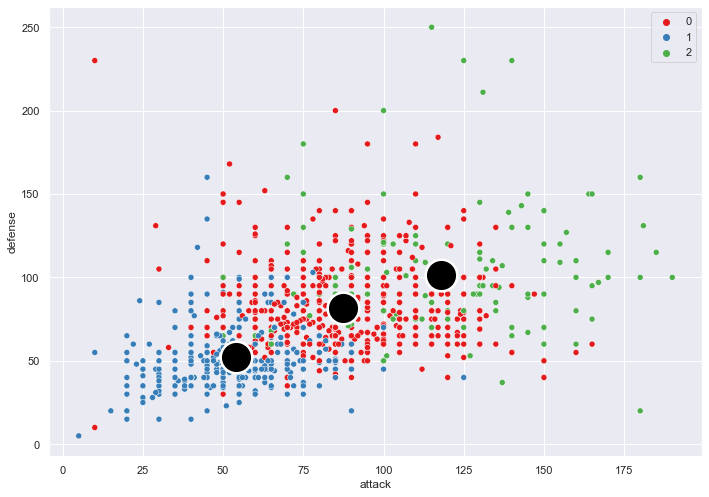

In [19]:
sns.scatterplot(data = res,
                x = 'attack',
                y = 'defense',
                hue = 'cluster',
                palette = "Set1")
sns.scatterplot(data = two_dim,
                x = 'attack',
                y = 'defense', color = 'black', s = 1000)

In [20]:
df_cluster_agg = res.groupby("cluster")[['attack', 'defense']].\
    agg({
    'attack' : ['mean', 'std'],
    'defense' : ['mean', 'std']
})
    # agg(m = ('kid_score', ['mean', 'std']), s = ('mom_iq','std'))
df_cluster_agg

attack                defense           
               mean        std        mean        std
cluster                                              
0         87.327778  24.839335   81.914815  26.531043
1         54.110497  18.745827   52.174033  19.625725
2        117.770588  30.389975  101.441176  33.650124

In [21]:
df_cluster_agg['attack']['mean'][0]

87.32777777777778

In [22]:
df_cluster_agg['attack']['mean']
df_cluster_agg['attack']['std']

cluster
0    24.839335
1    18.745827
2    30.389975
Name: std, dtype: float64

In [23]:
np.random.normal(df_cluster_agg['attack']['mean'], df_cluster_agg['attack']['std'])

array([ 47.65800205,  95.8692799 , 103.58704271])

In [25]:
df_sim_2 = pd.DataFrame()
df_sim_temp = pd.DataFrame()
df_sim_2['attack'] = np.random.normal(df_cluster_agg['attack']['mean'], df_cluster_agg['attack']['std'])
df_sim_2['defense'] = np.random.normal(df_cluster_agg['defense']['mean'], df_cluster_agg['defense']['std'])

for i in range(0, 100):
    df_sim_temp['attack'] = np.random.normal(df_cluster_agg['attack']['mean'], df_cluster_agg['attack']['std'])
    df_sim_temp['defense'] = np.random.normal(df_cluster_agg['defense']['mean'], df_cluster_agg['defense']['std'])
    df_sim_2 = df_sim_2.append(df_sim_temp)

df_sim_2['cluster'] = df_sim_2.index
df_sim_2.head()

C:\Users\wirze\AppData\Local\Temp\ipykernel_23544\2654913819.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sim_2 = df_sim_2.append(df_sim_temp)
C:\Users\wirze\AppData\Local\Temp\ipykernel_23544\2654913819.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sim_2 = df_sim_2.append(df_sim_temp)
C:\Users\wirze\AppData\Local\Temp\ipykernel_23544\2654913819.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sim_2 = df_sim_2.append(df_sim_temp)
C:\Users\wirze\AppData\Local\Temp\ipykernel_23544\2654913819.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sim_2 = df_sim_2.append(df_sim_temp)
C:\Users\wirze\AppData\Local\Tem

,attack,defense,cluster
0,98.804704,105.160678,0
1,54.786680,28.032420,1
2,73.492340,73.539514,2
0,97.663831,49.716450,0
1,46.323552,69.084188,1


<AxesSubplot:xlabel='attack', ylabel='defense'>

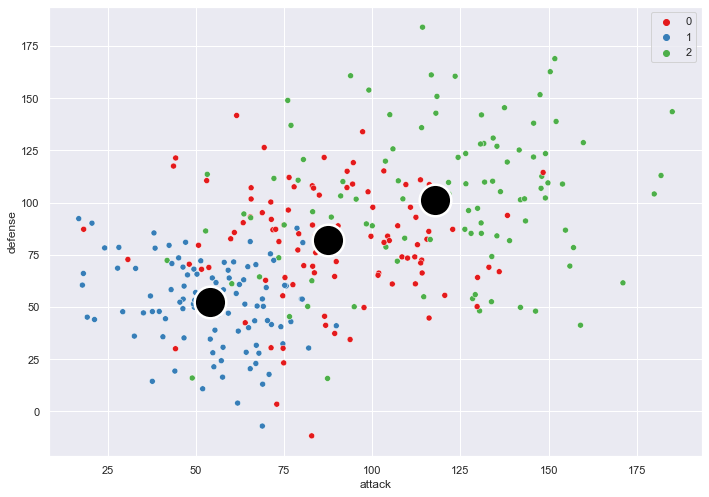

In [27]:
sns.scatterplot(data = df_sim_2,
                x = 'attack',
                y = 'defense',
                hue = 'cluster',
                palette="Set1")
sns.scatterplot(data = two_dim,
                x = 'attack',
                y = 'defense', color = 'black', s = 1000)

K means visually explained [gif](https://stackoverflow.com/questions/45353242/document-clustering-and-visualization/45353667)

C:\Users\wirze\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


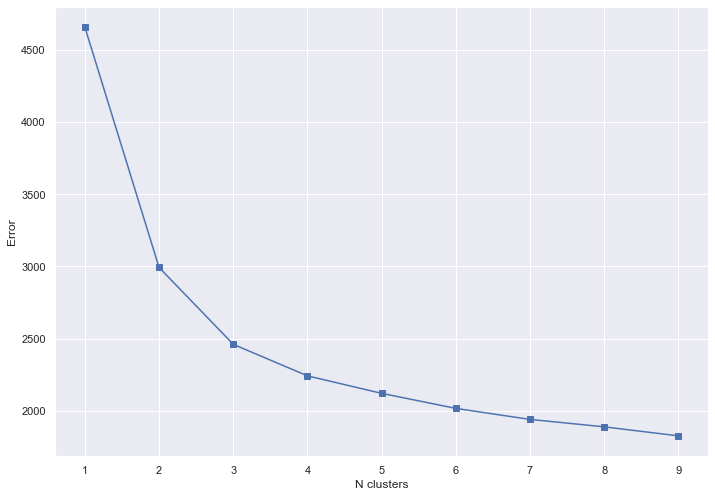

In [30]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_num)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('N clusters')
plt.ylabel('Error');

Read more about silhouette score at [help](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

An additional visualization and explanation available at this [blog](https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/)

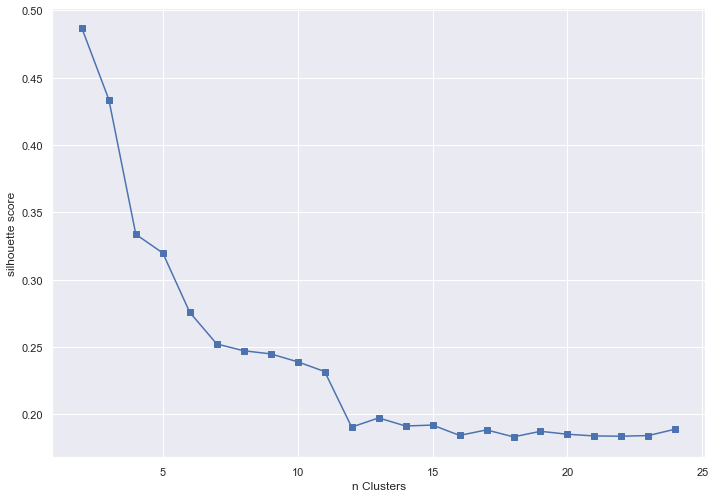

In [34]:
from sklearn import metrics
sil = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_num)
    sil.append(metrics.silhouette_score(df_num, kmeans.labels_))

plt.plot(range(2, 25), sil, marker='s');
plt.xlabel('n Clusters')
plt.ylabel('silhouette score');

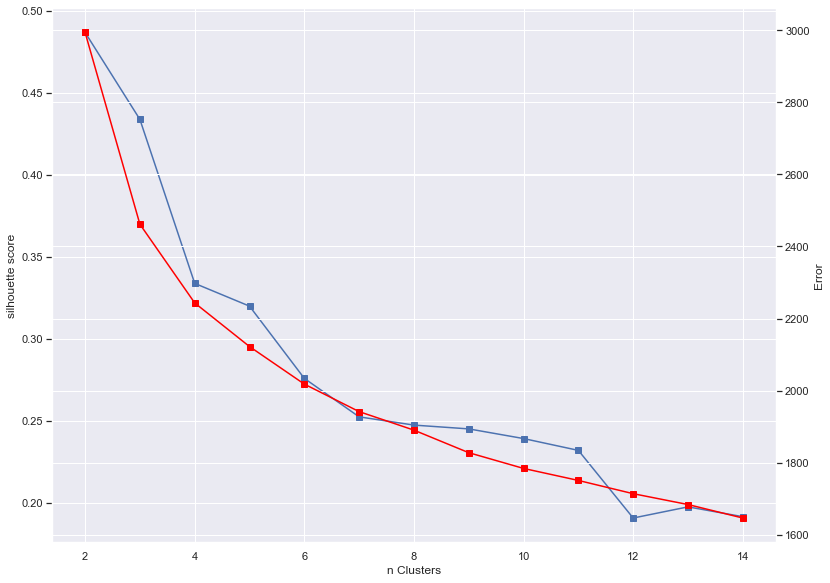

In [35]:
from sklearn import metrics
sil = []
inertia = []
max_k = 15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_num)
    sil.append(metrics.silhouette_score(df_num, kmeans.labels_))
    inertia.append(np.sqrt(kmeans.inertia_))

fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k), sil, marker='s')
ax1.set_xlabel('n Clusters')
ax1.set_ylabel('silhouette score')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\
ax2.plot(range(2, max_k), inertia, marker='s', color = 'red')
ax2.set_ylabel('Error')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Also try to calculate [Davies-Bouldin score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html) in the cell below

Questions to think about
In what case Silhouette and Error will be the lowest?

## lets bring all data

In [36]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [38]:
df_dumm = pd.get_dummies(df.drop(['name', 'number'], axis = 1), columns = ['type1', 'type2', 'generation', 'legendary'], drop_first=True)
df_dumm.head()

,total,hp,attack,defense,sp_attack,sp_defense,speed,type1_Bug,type1_Dark,type1_Dragon,...,type2_Water,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8,legendary_True
0,318,45,49,49,65,65,45,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,525,80,82,83,100,100,80,0,0,0,...,0,1,0,0,0,0,0,0,0,0


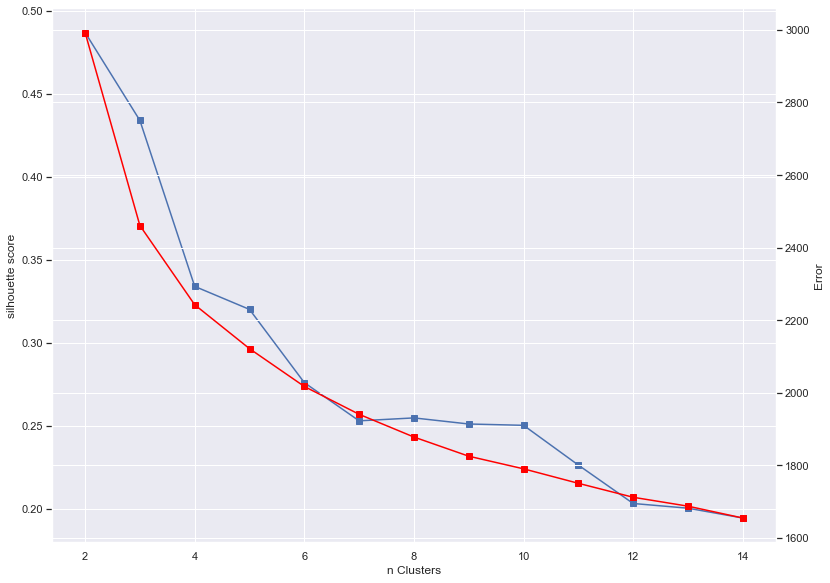

In [39]:
from sklearn import metrics
sil = []
inertia = []
max_k = 15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_dumm)
    sil.append(metrics.silhouette_score(df_dumm, kmeans.labels_))
    inertia.append(np.sqrt(kmeans.inertia_))

fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k), sil, marker='s')
ax1.set_xlabel('n Clusters')
ax1.set_ylabel('silhouette score')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\
ax2.plot(range(2, max_k), inertia, marker='s', color = 'red')
ax2.set_ylabel('Error')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [40]:
for k in range(2, 10):
    kmeans_1 = KMeans(n_clusters=k, random_state=1).fit(df_num)
    print("k = ", k)
    print("Only Nums")
    print("Error:" , np.sqrt(kmeans_1.inertia_))
    kmeans_2 = KMeans(n_clusters=k, random_state=1).fit(df_dumm)
    print("All columns")
    print("Error:" , np.sqrt(kmeans_2.inertia_))

k =  2
Only Nums
Error: 2993.1737630971184
All columns
Error: 2992.615530274924
k =  3
Only Nums
Error: 2461.4367398439113
All columns
Error: 2460.752214088346
k =  4
Only Nums
Error: 2243.2253253006097
All columns
Error: 2242.4859621198016
k =  5
Only Nums
Error: 2122.2747913973853
All columns
Error: 2121.4835669774207
k =  6
Only Nums
Error: 2018.1655407866035
All columns
Error: 2017.3477372052228
k =  7
Only Nums
Error: 1941.8444566693713
All columns
Error: 1940.6305228822853
k =  8
Only Nums
Error: 1890.5371064502738
All columns
Error: 1877.9919433505113
k =  9
Only Nums
Error: 1828.0238510071777
All columns
Error: 1825.1937265590905


## transformation
lets keep trying to improve our model

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dumm)
df_scaled[0:5]

array([[-1.01288146, -0.94903972, -0.98428263, -0.83249022, -0.25356592,
        -0.26777765, -0.79145477, -0.28969493, -0.21650635, -0.19941719,
        -0.24987608, -0.1480731 , -0.20932497, -0.25819889, -0.09201415,
        -0.20442149, -0.03055662,  3.22556279, -0.20193241, -0.19170416,
        -0.3500187 , -0.20193241, -0.28398092, -0.24349238, -0.19430418,
        -0.38118125, -0.16376789, -0.18371501, -0.1018213 , -0.20688537,
        -0.1754116 , -0.13068205, -0.34496074, -0.15765975, -0.16674655,
        -0.19430418, -0.13432678, -0.1018213 ,  5.01461279, -0.20442149,
        -0.12309149, -0.18641093, -0.14474937,  2.24108722, -0.33125647,
        -0.41885391, -0.35669944, -0.42804551, -0.29346133, -0.34496074,
        -0.38598158, -0.3516955 ],
       [-0.29578418, -0.390495  , -0.583647  , -0.38367877,  0.20616347,
         0.26944813, -0.29249011, -0.28969493, -0.21650635, -0.19941719,
        -0.24987608, -0.1480731 , -0.20932497, -0.25819889, -0.09201415,
        -0.20442

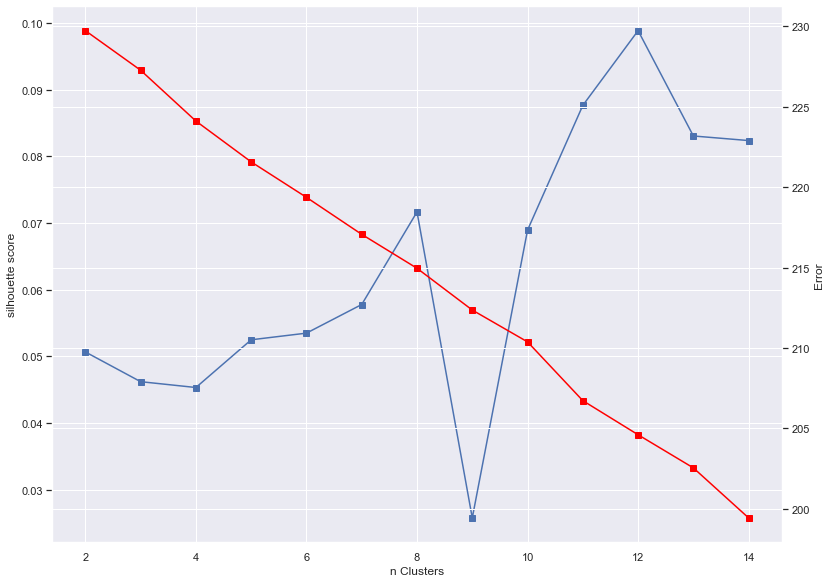

In [42]:
sil = []
inertia = []
max_k = 15
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    sil.append(metrics.silhouette_score(df_scaled, kmeans.labels_))
    inertia.append(np.sqrt(kmeans.inertia_))

fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k), sil, marker='s')
ax1.set_xlabel('n Clusters')
ax1.set_ylabel('silhouette score')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\
ax2.plot(range(2, max_k), inertia, marker='s', color = 'red')
ax2.set_ylabel('Error')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## maybe something else ?
Sure, but firstly a small step aside

In [43]:
from sklearn.datasets import make_classification

In [44]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
# for class_value in range(2):
#     # get row indexes for samples with this class
#     row_ix = where(y == class_value)
#     # create scatter of these samples
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# # show the plot
# pyplot.show()

In [45]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [46]:
df_synt = pd.DataFrame({
    'x':X[0:,0],
    'y':X[0:,1],
    'real': y[0:]
})
df_synt.head()

,x,y,real
0,1.225160,-0.951731,1
1,1.016304,-1.725175,1
2,0.335340,-1.724896,1
3,1.786348,-1.782653,1
4,1.016751,1.062569,1


<AxesSubplot:xlabel='x', ylabel='y'>

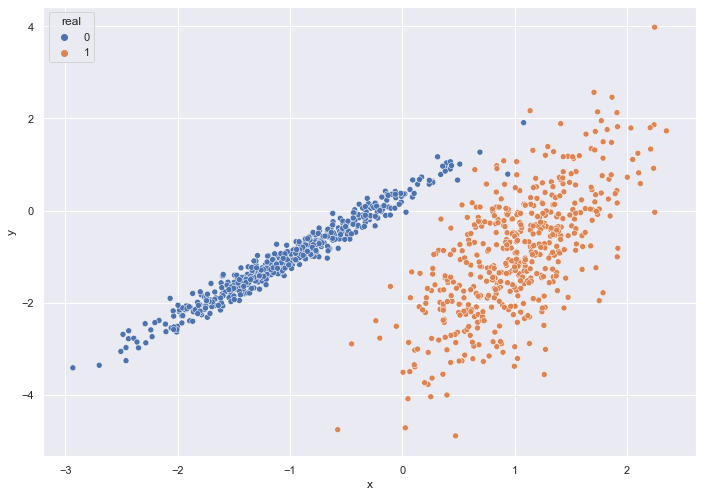

In [47]:
sns.scatterplot(data = df_synt, x = 'x', y = 'y', hue = 'real')

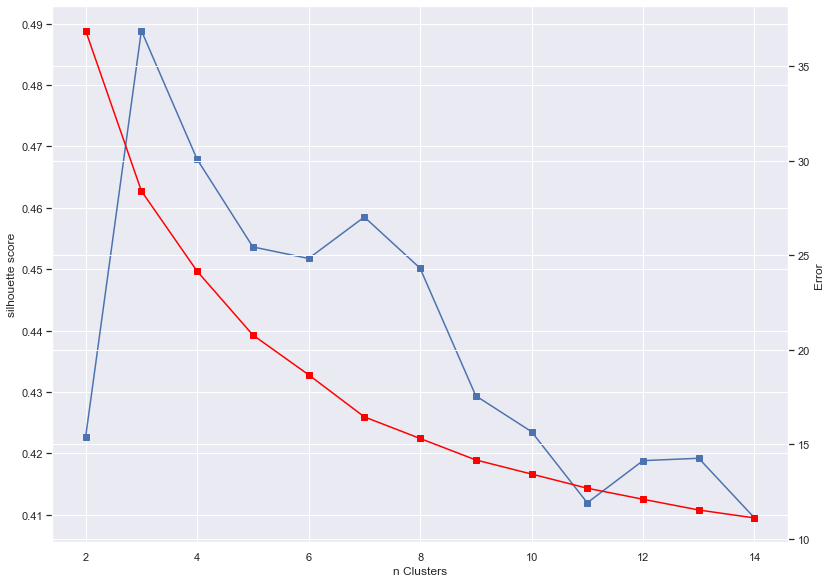

In [48]:
sil = []
inertia = []
max_k = 15
data = df_synt.drop('real', axis = 1)
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
    sil.append(metrics.silhouette_score(data, kmeans.labels_))
    inertia.append(np.sqrt(kmeans.inertia_))

fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k), sil, marker='s')
ax1.set_xlabel('n Clusters')
ax1.set_ylabel('silhouette score')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\
ax2.plot(range(2, max_k), inertia, marker='s', color = 'red')
ax2.set_ylabel('Error')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

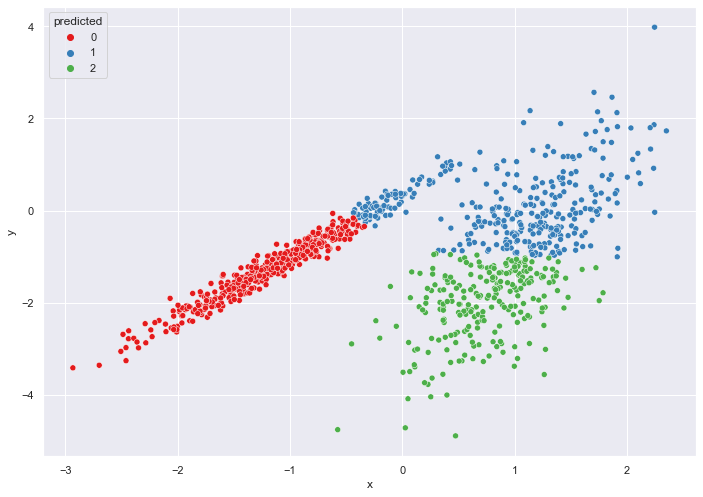

In [51]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(data)
df_synt_predicted = df_synt.copy()
df_synt_predicted['predicted'] = kmeans.labels_
sns.scatterplot(data = df_synt_predicted,
                x = 'x',
                y = 'y',
                hue = 'predicted',
                palette = 'Set1')

<AxesSubplot:xlabel='x', ylabel='y'>

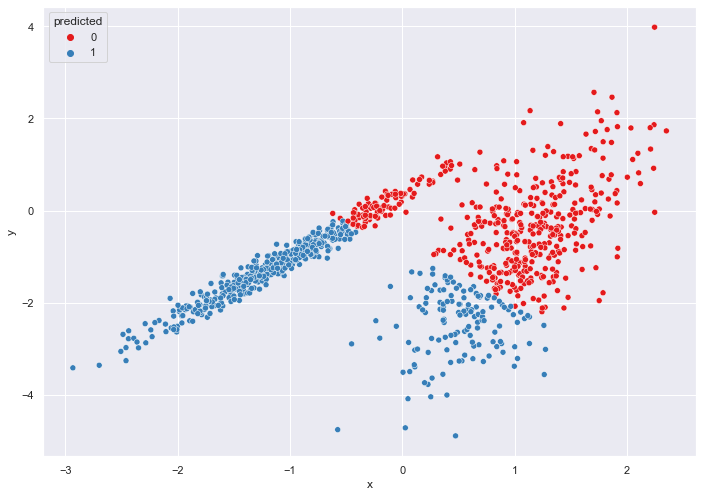

In [79]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(data)
df_synt_predicted = df_synt.copy()
df_synt_predicted['predicted'] = kmeans.labels_
sns.scatterplot(data = df_synt_predicted,
                x = 'x',
                y = 'y',
                hue = 'predicted',
                palette = 'Set1')

## Solution!!!!
Hierarchical and Gaussian

### hdbscan
probably you will have to install it...

explanatory [gif](https://dashee87.github.io/images/hierarch.gif)

[basic tutorial](https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html)

In [52]:
import hdbscan

hdbscaner = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = hdbscaner.fit_predict(data)

<AxesSubplot:xlabel='x', ylabel='y'>

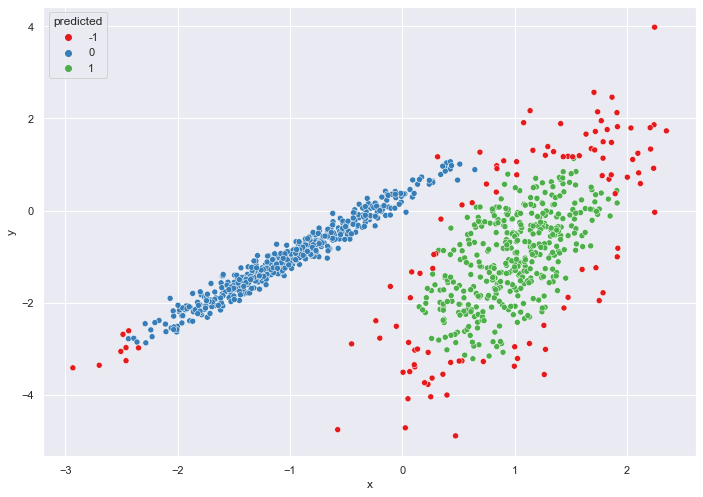

In [53]:
df_synt_predicted['predicted'] = cluster_labels
sns.scatterplot(data = df_synt_predicted,
                x = 'x',
                y = 'y',
                hue = 'predicted',
                palette = 'Set1')

### GMM

so more like k mean, but probabilistic

[gif](https://c.tenor.com/i1rNMdaKd7MAAAPo/gaussian-mixture-models-em-method-math.mp4)

[Wonderful explanation](https://brilliant.org/wiki/gaussian-mixture-model/)

In [54]:
from sklearn.mixture import GaussianMixture

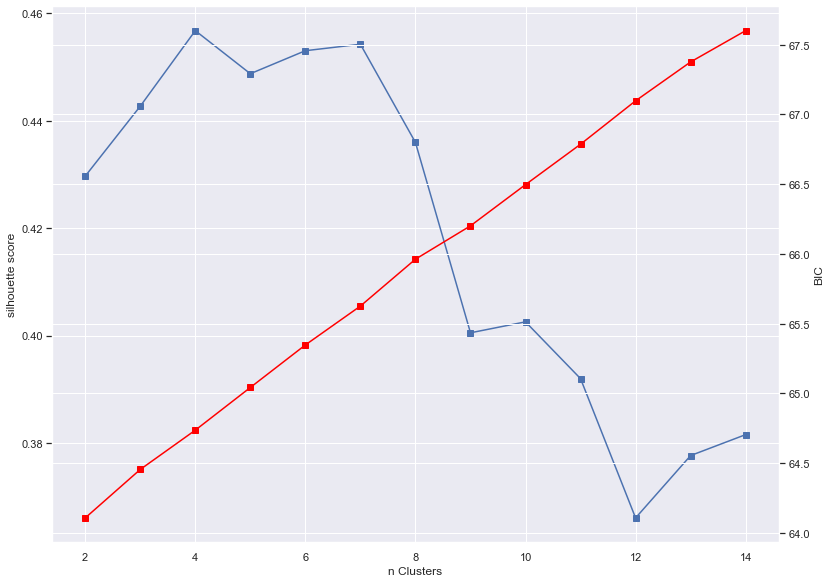

In [55]:
sil = []
inertia = []
max_k = 15
data = df_synt.drop('real', axis = 1)
for k in range(2, max_k):
    gm = GaussianMixture(n_components=k, random_state=0,
                         covariance_type = "full").fit(data)
    sil.append(metrics.silhouette_score(data, gm.predict(data)))
    inertia.append(np.sqrt(gm.bic(data)))

fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k), sil, marker='s')
ax1.set_xlabel('n Clusters')
ax1.set_ylabel('silhouette score')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\
ax2.plot(range(2, max_k), inertia, marker='s', color = 'red')
ax2.set_ylabel('BIC')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

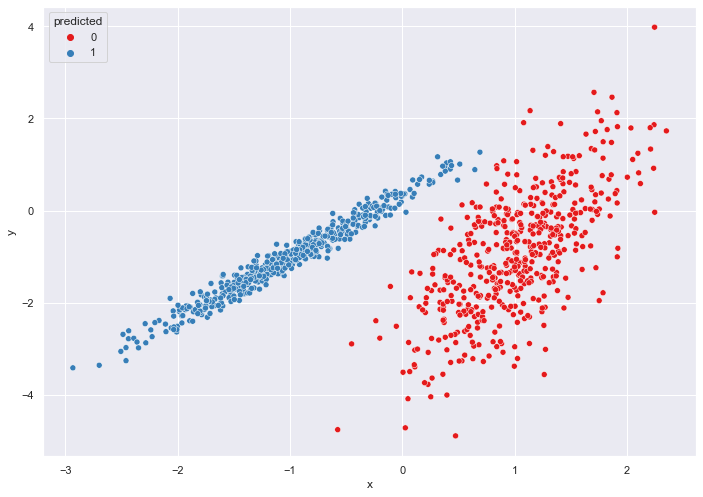

In [57]:
gm = GaussianMixture(n_components=2, random_state=0, covariance_type = "full")
cluster_labels = gm.fit_predict(data)
df_synt_predicted['predicted'] = cluster_labels
sns.scatterplot(data = df_synt_predicted,
                x = 'x',
                y = 'y',
                hue = 'predicted',
                palette = 'Set1')

## Some kind of HW, but that is more like a practice

For those who have already reached this point: download the dataset about credit card users [https://www.kaggle.com/arjunbhasin2013/ccdata](https://www.kaggle.com/arjunbhasin2013/ccdata)
* Formulate a problem to highlight subgroups
* Choose a method
* Do the analysis
* Draw meaningful conclusions

An [interactive](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) stuff for you to play with select an algorithm, see how it iterates trough the data

## EXTRA

Archetypes https://cran.r-project.org/web/packages/archetypes/vignettes/archetypes.pdf
If you are looking not for means of the data, but want to tell a story pushed to extremes

In [111]:
# !pip install archetypes

In [112]:
import archetypes as arch

In [114]:
aa = arch.AA(n_archetypes=4)

X_trans = aa.fit_transform(data)
X_trans

array([[0.54849557, 0.        , 0.00927287, 0.44223156],
       [0.6234754 , 0.        , 0.02394654, 0.35257806],
       [0.47009741, 0.        , 0.20791354, 0.32198905],
       ...,
       [0.        , 0.74715692, 0.13328775, 0.11955532],
       [0.50370556, 0.        , 0.10347846, 0.39281598],
       [0.57769784, 0.        , 0.01614526, 0.4061569 ]])

<AxesSubplot:>

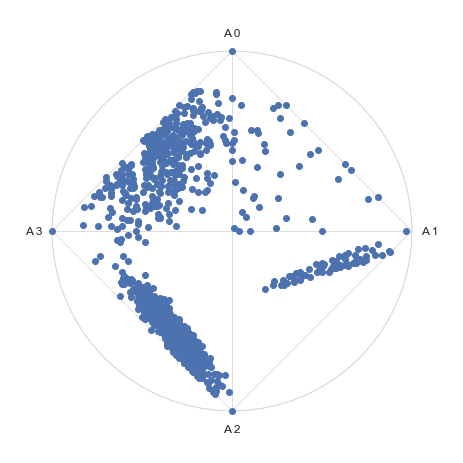

In [115]:
arch.simplex(X_trans)